Method: %s cv2.TM_CCOEFF
min_val:  -260910048.0
max_val:  490004032.0
min_loc:  (650, 385)
max_loc:  (644, 380)
 


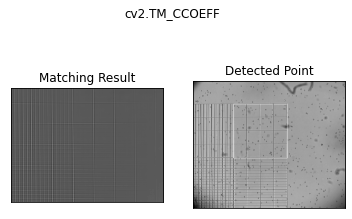

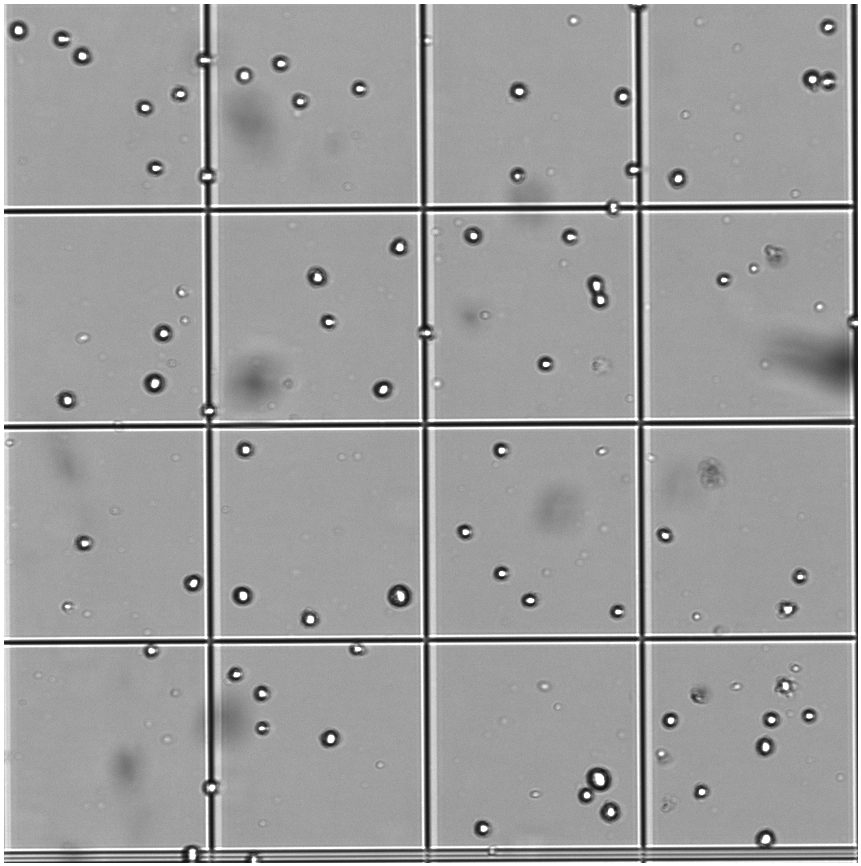

In [47]:
from PIL import Image
import glob
import os
import pathlib
from pylab import *
import glob as glob

from __future__ import print_function
import cv2
import numpy as np
from matplotlib import pyplot as plt

CWD_PATH = os.getcwd()

imgList=glob.glob(os.path.join(CWD_PATH,'*1.png'))         

save_path = os.path.join(CWD_PATH, 'cropped_images')
if not os.path.exists(save_path):
    os.makedirs(save_path)

height = 219
width = 225


def crop_image(height, width, k):
    for myFile in files:
        image = cv2.imread(myFile)                                              # Using OpenCV function imread to Open images in the file path
        # plt.imshow(image)                                                     # Show image (Debugging)
        # plt.show()
        imgheight = image.shape[0]                                              # Displaying of Image Height [0]
        imgwidth = image.shape[1]                                               # Displaying of Image Width [1]
        print(imgheight)
        print(imgwidth)
        for y in range(0,imgheight, height):                                    # First for loop to go through the height of the image stating from 0 to imgheight with height Increment 
            for x in range(0,imgwidth, width):                                  # Second for loop to go through the width of the image stating from 0 to imgwidth with width Increment 
                cropped = image[y:y+height, x:x+width]                          # Main Cropping using OpenCv Function
                if cropped.shape != (height, width, 3):                         # Excluding the cropped size outside our dimension
                  pass
                else:
                    # print(cropped.shape)                                        # Display (Debugging)
                    save_to = save_path + "image_1_" + str(k) + ".png"                   # Creating a Directory where the file will be saved
                    print(save_to)                                              # Display Path (Debugging)
                    # plt.imshow(cropped)                                         # Display (Debugging)  
                    # plt.show()
                    cv2.imwrite(save_to, cropped)                               # Saving the Cropped file using an OpenCV function imwrite
                    k += 1

try:
    img = cv2.imread(r'/content/2.png',0)
    template = cv2.imread(r'/content/Cell.png',0)
except IOError as e:
    print("({})".format(e))
else:
    img2 = img.copy()
    w, h = template.shape[::]
    #print(w)
    #print(h)

# All the 5 methods for comparison in a list
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
methods = ['cv2.TM_CCOEFF']

for meth in methods:
    img = img2.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print("Method: %s" , meth)
    print("min_val: " , min_val)
    print("max_val: " , max_val)
    print("min_loc: " , min_loc)
    print("max_loc: " , max_loc)
    print(" ")
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_CCOEFF, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 6)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth) 
    #plt.legend([min_val, max_val, min_loc, max_loc], ["min_val", "max_val", "min_loc", "max_loc"])

    plt.show()
    box = img[top_left[1] :top_left[1]+h, 0 + top_left[0]:bottom_right[0]+0]
    from google.colab.patches import cv2_imshow
    cv2_imshow(box)
    #cv2.imwrite(save_path, box)
    cv2.waitKey(0)

In [ ]:
for i, crop_area in enumerate(crop_areas_2):
        filename = os.path.splitext(img)[0]
        ext = os.path.splitext(img)[1]
        #new_filename = filename + '_' + str(i) + ext
        new_filename = os.path.join(save_path,pic_name + "_" + str(i) + ".png")

        cropped_image = image.crop(crop_area)
        cropped_image.save(new_filename)

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/1.PNG')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 5)
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blur, -1, sharpen_kernel)

thresh = cv2.threshold(sharpen,160,255, cv2.THRESH_BINARY_INV)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
close = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

cnts = cv2.findContours(close, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

min_area = 215
max_area = 215
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area and area < max_area:
        x,y,w,h = cv2.boundingRect(c)
        ROI = image[y:y+h, x:x+h]
        cv2.imwrite('ROI_{}.png'.format(image_number), ROI)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        image_number += 1

from google.colab.patches import cv2_imshow
#cv2.imshow('sharpen', sharpen)
#cv2.imshow('close', close)
#cv2.imshow('thresh', thresh)
cv2_imshow(image)
cv2.waitKey()

In [ ]:

### Template matching, single object in an image.
#Multiple methods to see which one works best. 

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('/content/1.PNG')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/Cell.png', 0)
h, w = template.shape[::] 

#methods available: ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCORR_NORMED)
# For TM_SQDIFF, Good match yields minimum value; bad match yields large values
# For all others it is exactly opposite, max value = good fit.
plt.imshow(res, cmap='gray')

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc  #Change to max_loc for all except for TM_SQDIFF
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(img_gray, top_left, bottom_right, 255, 2)  #White rectangle with thickness 2. 

from google.colab.patches import cv2_imshow

cv2_imshow(img_gray)
cv2.waitKey()
cv2.destroyAllWindows()

       


In [ ]:
### Template matching - multiple objects

#For multiple occurances, cv2.minMaxLoc() won’t give all the locations
#So we need to set a threshold
    
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_rgb = cv2.imread('/content/1.PNG')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/content/Cell.png',0)
h, w = template.shape[::]

res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
plt.imshow(res, cmap='gray')

threshold = 0.8 #Pick only values above 0.8. For TM_CCOEFF_NORMED, larger values = good fit.

loc = np.where( res >= threshold)  
#Outputs 2 arrays. Combine these arrays to get x,y coordinates - take x from one array and y from the other.

#Reminder: ZIP function is an iterator of tuples where first item in each iterator is paired together,
#then the second item and then third, etc. 

for pt in zip(*loc[::-1]):   #-1 to swap the values as we assign x and y coordinate to draw the rectangle. 
    #Draw rectangle around each object. We know the top left (pt), draw rectangle to match the size of the template image.
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)  #Red rectangles with thickness 2. 

cv2.imwrite('images/template_matched.jpg', img_rgb)

from google.colab.patches import cv2_imshow

cv2_imshow(img_rgb)
cv2.waitKey()
cv2.destroyAllWindows()